In [1]:
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams

rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20

import numpy as np

In [2]:
# draw samples from gaussian

# logarithm matrix of probability density of specific values (likelihood)
def log_prob(x, mu, cov):
    diff = x - mu
    return -0.5 * np.dot(diff, np.linalg.solve(cov, diff))

# first item is position of walker

In [3]:
log_prob

<function __main__.log_prob(x, mu, cov)>

In [4]:
# setup specific values (5 dimensions)
ndim = 5

np.random.seed(42)
means = np.random.rand(ndim)

cov = 0.5 - np.random.rand(ndim**2).reshape((ndim, ndim))
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov, cov)

# means is 5x1 and cov is 5x5

In [5]:
means, cov

(array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864]),
 array([[ 0.50123328, -0.02919697, -0.31413411,  0.04476438, -0.10623147],
        [-0.02919697,  0.71060761,  0.08863136, -0.15006354, -0.1539235 ],
        [-0.31413411,  0.08863136,  0.29343271, -0.04202359,  0.06292544],
        [ 0.04476438, -0.15006354, -0.04202359,  0.11739352,  0.15256884],
        [-0.10623147, -0.1539235 ,  0.06292544,  0.15256884,  0.3957519 ]]))

In [6]:
# starting with 32 walkers
# randomize initial position for 32 walkers
nwalkers = 32
p0 = np.random.rand(nwalkers, ndim)

In [7]:
p0.shape

(32, 5)

In [8]:
# emcee interface: EnsembleSampler

import emcee

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, args=[means, cov])

In [9]:
# call likelihood: either provide 1 or 3 arguments. 
log_prob(p0[0], means, cov)
#log_prob(p0[0])

-2.596094589085444

In [10]:
# run MCMC with 100step Burn-in and save walker final position to 'state'
state = sampler.run_mcmc(p0, 100)

# clear all parameters
sampler.reset()

In [11]:
%time
# start production MCMC from saved Burn-in 'state'
sampler.run_mcmc(state, 10000);

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 52.5 µs


In [12]:
# get position of walkers in each step with an (10000, 32, 5) shaped array
# using EnsembleSampler.get_chain()
chain = emcee.EnsembleSampler.get_chain(sampler)
chain.shape

(10000, 32, 5)

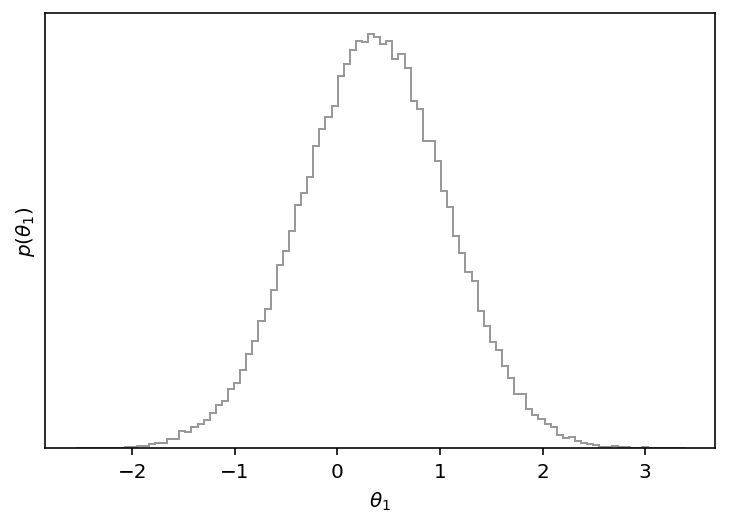

In [33]:
# make histogram of samples to get estimate of parameter density
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(samples[:, 0], color='k', bins=100, hist_kws={'histtype': 'step'}, kde=False)
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$p(\theta_1)$")
plt.gca().set_yticks([]);

In [34]:
samples.shape
# became flat? 

(320000, 5)

In [37]:
#check if the sampling is complete

In [35]:
# check sampling using mean acceptance fraction
print(
    "Mean acceptance fraction: {0:.3f}".format(
        np.mean(sampler.acceptance_fraction)
    )
)

Mean acceptance fraction: 0.552


In [38]:
# using integrated autocorrelation time
print(
    "Mean autocorrelation time: {0:.3f} steps".format(
        np.mean(sampler.get_autocorr_time())
    )
)

Mean autocorrelation time: 57.112 steps
